In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv', low_memory=False)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [4]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [6]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma          

In [7]:
columns_to_drop = ['id', 'spkid', 'prefix', 'diameter_sigma', 'orbit_id', 'epoch_mjd', 'epoch_cal', 
                   'equinox', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
                   'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15142 entries, 0 to 479552
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_name  15142 non-null  object 
 1   pdes       15142 non-null  object 
 2   name       15142 non-null  object 
 3   neo        15142 non-null  object 
 4   pha        15142 non-null  object 
 5   H          15142 non-null  float64
 6   diameter   15142 non-null  float64
 7   albedo     15142 non-null  float64
 8   epoch      15142 non-null  float64
 9   e          15142 non-null  float64
 10  a          15142 non-null  float64
 11  q          15142 non-null  float64
 12  i          15142 non-null  float64
 13  om         15142 non-null  float64
 14  w          15142 non-null  float64
 15  ma         15142 non-null  float64
 16  ad         15142 non-null  float64
 17  n          15142 non-null  float64
 18  tp         15142 non-null  float64
 19  tp_cal     15142 non-null  float64
 20  per       

In [10]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
full_name    0
pdes         0
name         0
neo          0
pha          0
H            0
diameter     0
albedo       0
epoch        0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
class        0
dtype: int64


In [11]:
 df.shape

(15142, 25)

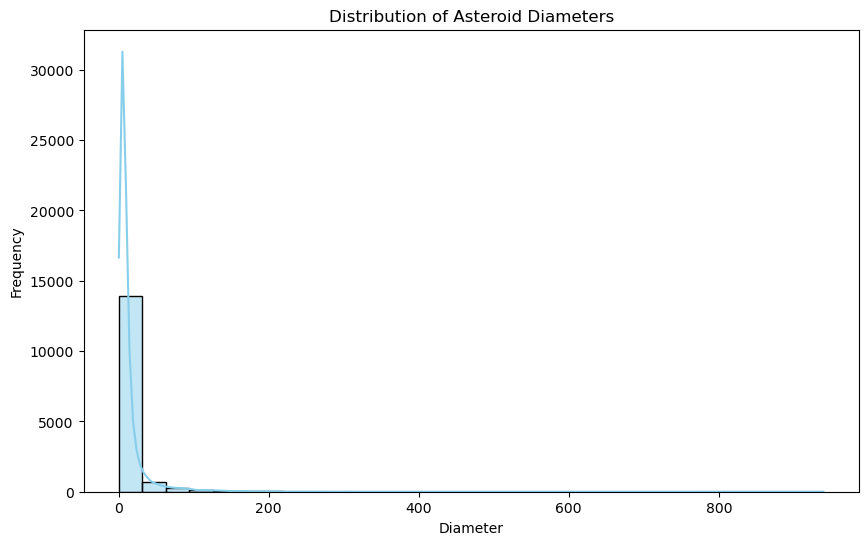

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['diameter'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Asteroid Diameters')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()

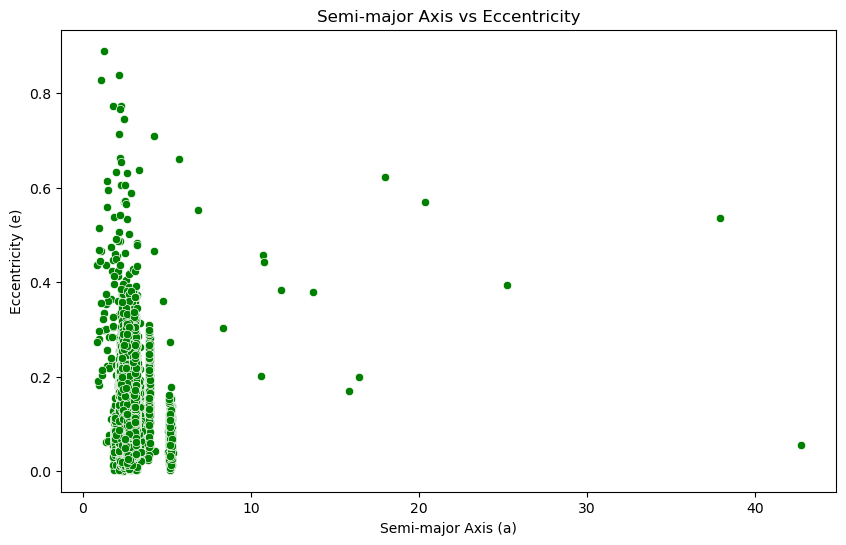

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='a', y='e', data=df, color='green')
plt.title('Semi-major Axis vs Eccentricity')
plt.xlabel('Semi-major Axis (a)')
plt.ylabel('Eccentricity (e)')
plt.show()

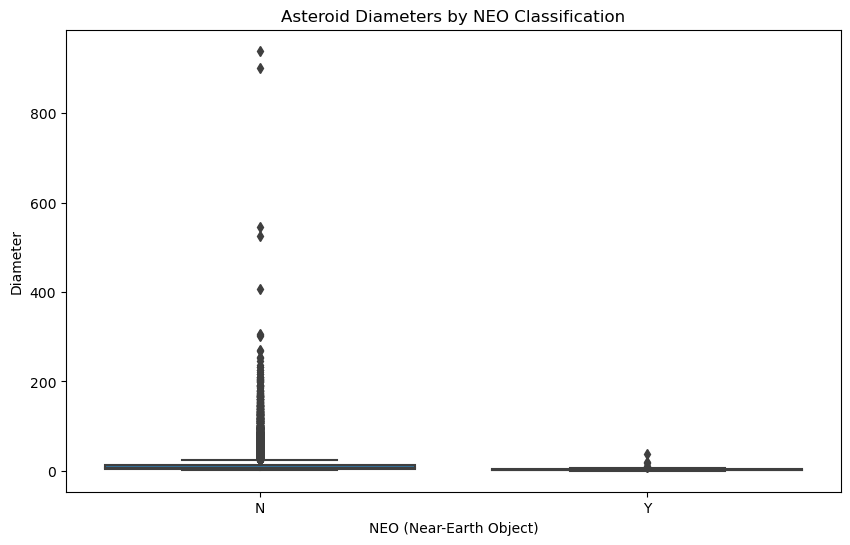

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neo', y='diameter', data=df)
plt.title('Asteroid Diameters by NEO Classification')
plt.xlabel('NEO (Near-Earth Object)')
plt.ylabel('Diameter')
plt.show()

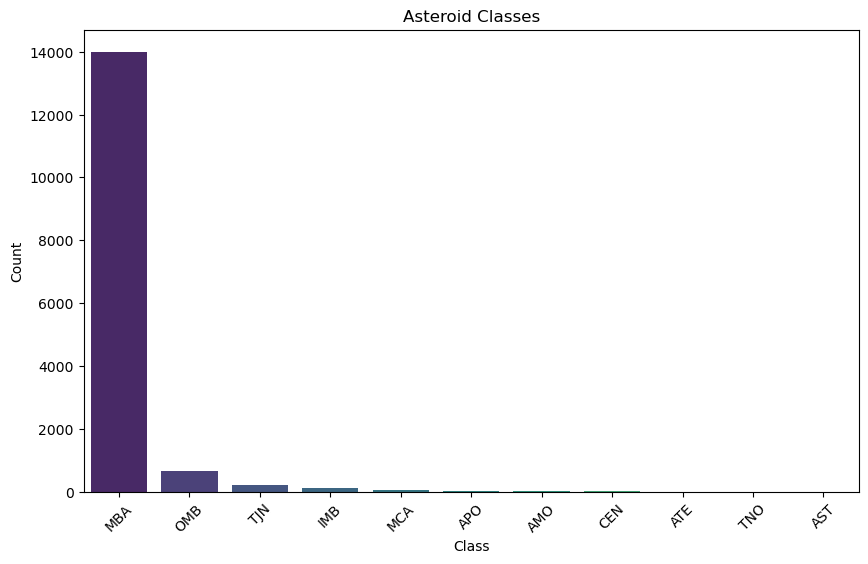

In [15]:
plt.figure(figsize=(10, 6))
class_counts = df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Asteroid Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

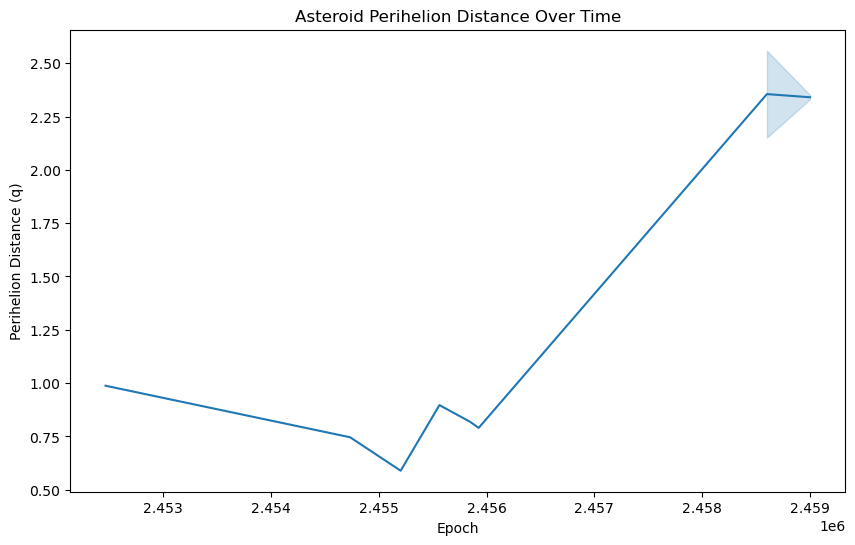

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='epoch', y='q', data=df)
plt.title('Asteroid Perihelion Distance Over Time')
plt.xlabel('Epoch')
plt.ylabel('Perihelion Distance (q)')
plt.show()

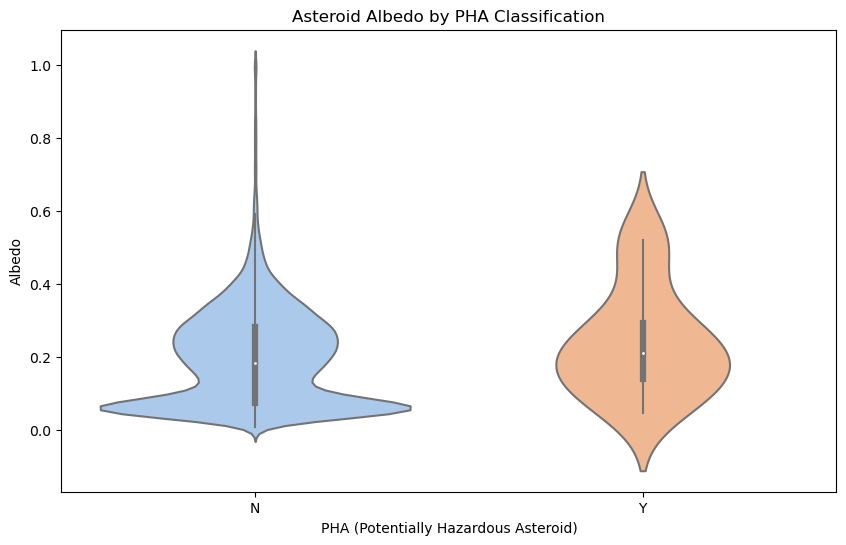

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='pha', y='albedo', data=df, palette='pastel')
plt.title('Asteroid Albedo by PHA Classification')
plt.xlabel('PHA (Potentially Hazardous Asteroid)')
plt.ylabel('Albedo')
plt.show()

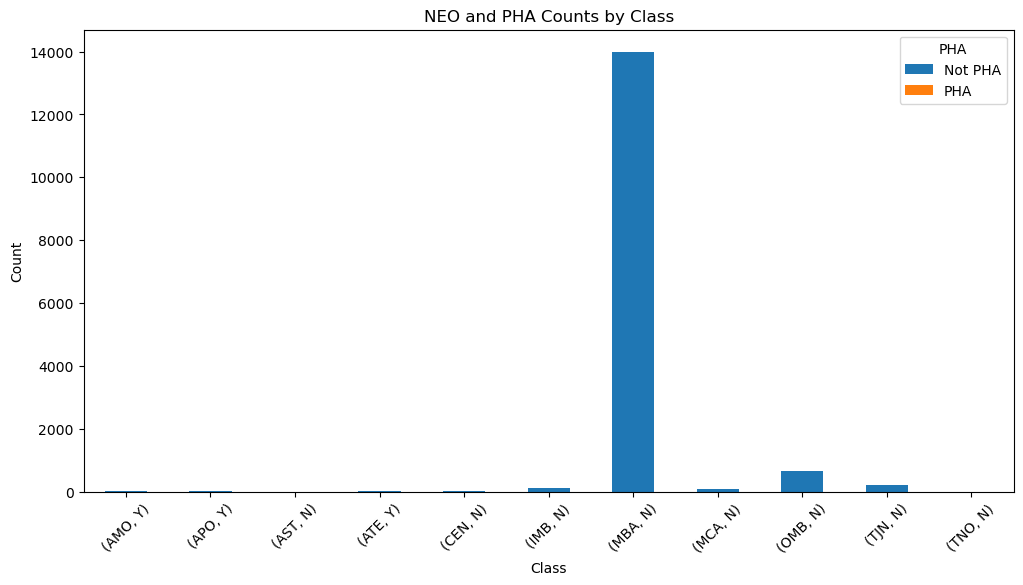

In [18]:
class_counts_neo_pha = df.groupby(['class', 'neo', 'pha']).size().unstack(fill_value=0)
class_counts_neo_pha.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('NEO and PHA Counts by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='PHA', labels=['Not PHA', 'PHA'])
plt.show()